* Set objective function to glucose minimization
* Set upper bounds for biomass: 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 (0.30 is max Rhodotorula growth rate in lab)
* Find exchange fluxes 

In [1]:
import cobra
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np
os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
import rpy2.robjects
from plotnine import *
import matplotlib.pyplot as plt

In [2]:
# Importing the model
model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880.xml")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-21


In [3]:
# Change glucose bounds
model.reactions.get_by_id("EX_glc__D_e").upper_bound = 9999
model.reactions.get_by_id("EX_glc__D_e").lower_bound = -9999

In [4]:
# Changing the objective function to glucose min
model.objective = "EX_glc__D_e" 
solution = model.optimize('minimize') # minimize the objective function, get solution

In [5]:
# Getting biomass compositions???
# Muuda biomassi compositionite koeffitsiente - proovimiseks


In [6]:
# Getting exchange fluxes: glucose, CO2, ammonium and other minerals, others, like glycerol ['glc__D_e', 'o2_e', 'glyc_e', 'nh4_e',	'so4_e',	'pi_e', 'co2_e']  

# Make a pd dataframe with all exchange fluxes that are not zero, then make a pivot table with wanted metabolites fluxes on different growth rates
GR_range= [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]

model.reactions.BIOMASS_RT.bounds = GR_range[0], GR_range[0]
solution = model.optimize('minimize')
exchange_fluxes_all = model.summary().to_frame()
exchange_fluxes_all['GR'] = GR_range[0]


for i in range(1, len(GR_range)):
    model.reactions.BIOMASS_RT.bounds = GR_range[i], GR_range[i]
    solution = model.optimize('minimize')
    model_summary = model.summary().to_frame()
    model_summary['GR'] = GR_range[i]
    exchange_fluxes_all = pd.concat([exchange_fluxes_all, model_summary], axis=0)  
    
# exchange_fluxes_all = exchange_fluxes_all[(exchange_fluxes_all['flux']) != 0.0] # for getting non-zero fluxes only
exchange_fluxes_all['flux'] = abs(exchange_fluxes_all['flux'])





In [7]:
# Get all non-zero exchange fluxes
exchange_fluxes_table_all = pd.pivot_table(exchange_fluxes_all, values='flux', index=['GR'], columns=['metabolite'])

exchange_fluxes_table_all

metabolite,12ppd__R_e,12ppd__S_e,13BDglcn_e,2doxg6p_e,2hxmp_e,2obut_e,2pg_e,35ccmp_e,35cgmp_e,3aap_c,...,uri_e,val__L_e,xan_e,xtsn_e,xyl__D_e,xylt_e,xylu__D_e,zn2_e,zymst_e,zymstest_RT_d
GR,,,,,,,,,,,,,,,,,,,,,
0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000026,0.006747,0.0
0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000051,0.013495,0.0
0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.106239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000077,0.020242,0.0
0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.141652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000102,0.026989,0.0
0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000128,0.033736,0.0
0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.212478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000153,0.040483,0.0


In [8]:
# Get specific metabolites with their fluxes
exchange_fluxes_table = pd.pivot_table(exchange_fluxes_all[exchange_fluxes_all.metabolite.isin(['glc__D_e', 'o2_e', 'glyc_e', 'nh4_e',	'so4_e',	'pi_e', 'co2_e'])], 
                                       values='flux', index=['GR'], columns=['metabolite'])

exchange_fluxes_table

metabolite,co2_e,glc__D_e,glyc_e,nh4_e,o2_e,pi_e,so4_e
GR,,,,,,,
0.05,1.803280,0.691224,0.0,0.330015,1.617112,0.013311,0.005012
0.10,3.423804,1.351989,0.0,0.660029,3.051467,0.026622,0.010024
0.15,5.044459,2.012776,0.0,0.990044,4.485954,0.039932,0.015036
0.20,6.665114,2.673563,0.0,1.320059,5.920441,0.053243,0.020048
0.25,8.285770,3.334350,0.0,1.650074,7.354929,0.066554,0.025060
0.30,9.906425,3.995137,0.0,1.980088,8.789416,0.079864,0.030071


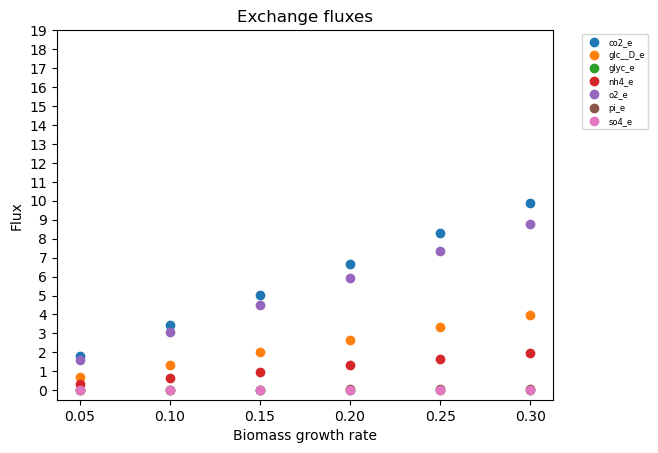

In [9]:
# Make plots for exchange reactions

plt.plot(GR_range, exchange_fluxes_table[exchange_fluxes_table.columns], 'o', label = exchange_fluxes_table.columns)

plt.xlabel('Biomass growth rate')
plt.ylabel('Flux')
plt.title("Exchange fluxes")
plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.yticks(range(0, 20, 1))
plt.show()

In [10]:
# # Export DataFrames to excel - NB! Will overwrite the pages
# with pd.ExcelWriter("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Simulated_fluxes\\Ex_fluxes_glc_min.xlsx") as excel_writer:
#     exchange_fluxes_table_all.to_excel(excel_writer, sheet_name='Sheet1', index=True)


In [11]:
# Get all flux values
all_fluxes = solution.fluxes
import escher
escher.Builder(reaction_data=all_fluxes)

ModuleNotFoundError: No module named 'escher'